In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme()
sns.set_context("paper", font_scale=1.5)
sns.set_style('ticks', {'font.family': 'Times New Roman'})

In [2]:
class NewFormatter(plt.LogFormatter):
    def _num_to_string(self, x, vmin, vmax):
        if x > 10000:
            s = '%1.0e' % x
        else:
            s = self._pprint_val(x, vmax - vmin)
        return s

formatter_x = NewFormatter(labelOnlyBase=False, minor_thresholds=(0.8, 0.5))

def finalize_plot(ax, log=False, margins=False, **kwargs):
    if kwargs:
        ax.set(**kwargs)
    if log:
        ax.xaxis.set_major_formatter(formatter_x)
        ax.xaxis.set_minor_formatter(formatter_x)
    if not margins:
        ax.margins(x=0)
    #if title is not None:
    #    ax.set_title(title)

In [3]:
visir = pd.read_csv('../Data/VISIR_merged_fluxes_TMP.csv', sep=',', skipinitialspace=True, na_values=['#NAME?'])

labels_x = []
labels_y = []

for row in visir.itertuples():
    if np.isnan(row.flux_x):
        labels_x.append('Missing')
    elif row.cen_x == 0.0:
        labels_x.append('Non-det')
    else:
        labels_x.append('Detection')
        
    if np.isnan(row.flux_y):
        labels_y.append('Missing')
    elif row.cen_y == 0.0:
        labels_y.append('Non-det')
    else:
        labels_y.append('Detection')

visir['type_x'] = labels_x
visir['type_y'] = labels_y

xy_labels = np.empty_like(visir['type_x'].values)
xy_labels[visir['type_x'] != 'Missing'] = 'H$_2$O'
xy_labels[visir['type_y'] != 'Missing'] = 'Neon[II]'
xy_labels[xy_labels == None] = 'None'

visir['Molecule'] = xy_labels

In [4]:
prop_count = visir['Mstar'].count()
data_size = len(visir)
prop_completeness =  prop_count / data_size 

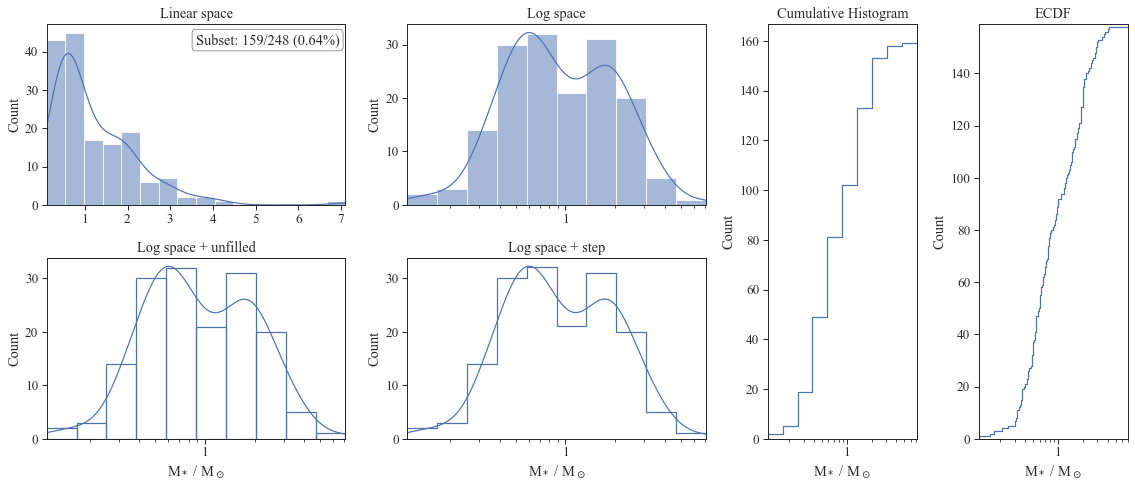

In [5]:
widths = [2, 2, 1, 1]
heights = [1, 1]

fig, [[ax1, ax2, ax3, ax4], 
      [ax5, ax6, ax7, ax8]] = plt.subplots(nrows=2, ncols=4, figsize=(16, 7), 
                                                                 gridspec_kw=dict(width_ratios=widths, height_ratios=heights))
gs = ax3.get_gridspec()

# Remove right column, combine axes
for ax in [ax3, ax7, ax4, ax8]:
    ax.remove()

axbig1 = fig.add_subplot(gs[:, -2])
axbig2 = fig.add_subplot(gs[:, -1])

ax1 = sns.histplot(data=visir, x="Mstar", kde=True, stat='count', log_scale=False, ax=ax1)
finalize_plot(ax1, title='Linear space', xlabel='')
# ax1.set(ylabel=f'Counts:{prop_count} out of {data_size} ({prop_completeness:.2f})')
ax1.text(s=f'Subset: {prop_count}/{data_size} ({prop_completeness:.2f}%)', x=0.98, y=0.95, va='top', ha='right', transform=ax1.transAxes,
        bbox={'boxstyle': 'round', 'pad': 0.25, 'facecolor': 'white', 'edgecolor': 'gray'})


ax2 = sns.histplot(data=visir, x="Mstar", kde=True, stat='count', log_scale=True, ax=ax2)
finalize_plot(ax2, log=True, title='Log space', xlabel='')

sns.histplot(data=visir, x="Mstar", kde=True, stat='count', log_scale=True, fill=False, ax=ax5)
finalize_plot(ax5, log=True, title='Log space + unfilled', xlabel='M$_*$ / M$_\odot$')

sns.histplot(data=visir, x="Mstar", kde=True, stat='count', log_scale=True, fill=False, element='step', ax=ax6)
finalize_plot(ax6, log=True, title='Log space + step', xlabel='M$_*$ / M$_\odot$')

sns.histplot(data=visir, x="Mstar", log_scale=True, fill=False, element='step', 
             cumulative=True, stat="count", common_norm=False, ax=axbig1)
finalize_plot(axbig1, log=True, title='Cumulative Histogram', xlabel='M$_*$ / M$_\odot$')

sns.ecdfplot(data=visir, x="Mstar", stat='count', log_scale=False, ax=axbig2)
finalize_plot(axbig2, log=True, title='ECDF', xscale='log', xlabel='M$_*$ / M$_\odot$')

plt.tight_layout()

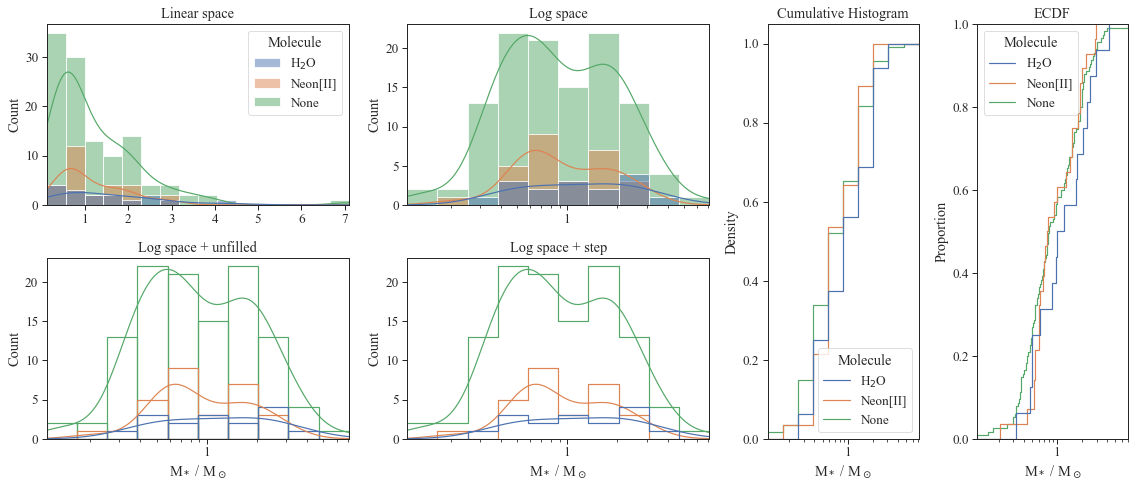

In [6]:
widths = [2, 2, 1, 1]
heights = [1, 1]

fig, [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]] = plt.subplots(nrows=2, ncols=4, figsize=(16, 7), gridspec_kw=dict(width_ratios=widths, height_ratios=heights))
gs = ax3.get_gridspec()

# Remove right column, combine axes
for ax in [ax3, ax7, ax4, ax8]:
    ax.remove()

axbig1 = fig.add_subplot(gs[:, -2])
axbig2 = fig.add_subplot(gs[:, -1])

ax1 = sns.histplot(data=visir, x="Mstar", hue='Molecule', kde=True, stat='count', log_scale=False, ax=ax1)
finalize_plot(ax1, title='Linear space', xlabel='')

ax2 = sns.histplot(data=visir, x="Mstar", hue='Molecule', kde=True, stat='count', log_scale=True, legend=False, ax=ax2)
finalize_plot(ax2, log=True, title='Log space', xlabel='')

sns.histplot(data=visir, x="Mstar", hue='Molecule', kde=True, stat='count', log_scale=True, fill=False, legend=False, ax=ax5)
finalize_plot(ax5, log=True, title='Log space + unfilled', xlabel='M$_*$ / M$_\odot$')

sns.histplot(data=visir, x="Mstar", hue='Molecule', kde=True, stat='count', log_scale=True, fill=False, element='step', legend=False, ax=ax6)
finalize_plot(ax6, log=True, title='Log space + step', xlabel='M$_*$ / M$_\odot$')

sns.histplot(data=visir, x="Mstar", hue='Molecule', log_scale=True, fill=False, element='step', 
             cumulative=True, stat="density", common_norm=False, ax=axbig1)
finalize_plot(axbig1, log=True, title='Cumulative Histogram', xlabel='M$_*$ / M$_\odot$')

sns.ecdfplot(data=visir, x="Mstar", hue='Molecule', log_scale=False, ax=axbig2)
finalize_plot(axbig2, log=True, title='ECDF', xlabel='M$_*$ / M$_\odot$', xscale='log')

plt.tight_layout()

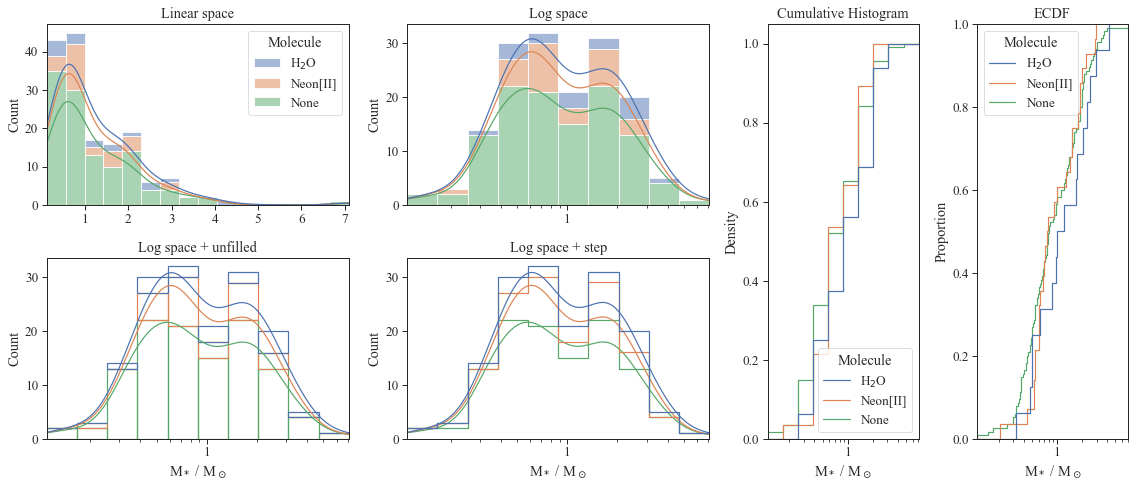

In [7]:
widths = [2, 2, 1, 1]
heights = [1, 1]

fig, [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8]] = plt.subplots(nrows=2, ncols=4, figsize=(16, 7), gridspec_kw=dict(width_ratios=widths, height_ratios=heights))
gs = ax3.get_gridspec()

# Remove right column, combine axes
for ax in [ax3, ax7, ax4, ax8]:
    ax.remove()

axbig1 = fig.add_subplot(gs[:, -2])
axbig2 = fig.add_subplot(gs[:, -1])

ax1 = sns.histplot(data=visir, x="Mstar", hue='Molecule', multiple="stack", kde=True, stat='count', log_scale=False, ax=ax1)
finalize_plot(ax1, title='Linear space', xlabel='')

ax2 = sns.histplot(data=visir, x="Mstar", hue='Molecule', multiple="stack", kde=True, stat='count', log_scale=True, legend=False, ax=ax2)
finalize_plot(ax2, log=True, title='Log space', xlabel='')

sns.histplot(data=visir, x="Mstar", hue='Molecule', multiple="stack", kde=True, stat='count', log_scale=True, fill=False, legend=False, ax=ax5)
finalize_plot(ax5, log=True, title='Log space + unfilled', xlabel='M$_*$ / M$_\odot$')

sns.histplot(data=visir, x="Mstar", hue='Molecule', multiple="stack", kde=True, stat='count', log_scale=True, fill=False, element='step', legend=False, ax=ax6)
finalize_plot(ax6, log=True, title='Log space + step', xlabel='M$_*$ / M$_\odot$')

sns.histplot(data=visir, x="Mstar", hue='Molecule', log_scale=True, fill=False, element='step', 
             cumulative=True, stat="density", common_norm=False, ax=axbig1)
finalize_plot(axbig1, log=True, title='Cumulative Histogram', xlabel='M$_*$ / M$_\odot$')

sns.ecdfplot(data=visir, x="Mstar", hue='Molecule', log_scale=False, ax=axbig2)
finalize_plot(axbig2, log=True, title='ECDF', xscale='log', xlabel='M$_*$ / M$_\odot$')

plt.tight_layout()